In [1]:
# Imports

# Basics
import numpy as np
import pandas as pd

#Graphics
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import plotly.express as px
import folium
from folium import plugins
from folium.plugins import HeatMap

# Datetime
from datetime import datetime

%matplotlib inline

### Project description

In this Data exploration project, it is intended to analyze and understand the **New York City AirBnb Open Data** from 2019 to extract the maximum of business insights from it.
Some of the questions we are going to answer are:
- What can we learn about different hosts and areas?
- What can we learn from predictions? (ex: locations, prices, reviews, etc)
- Which hosts are the busiest and why?
- Is there any noticeable difference of traffic among different areas and what could be the reason for it?

### Loading and viewing the dataset

In [2]:
# Open Dataset
path = 'AB_NYC_2019.csv'
df = pd.read_csv(path)

In [3]:
# First view to understand how the data is organized
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


I like to start the data exploration with a good statistical description of the dataset, so that way I can already extract the first insights to keep exploring. Here, I will exclude the columns *'id', 'host_id', 'latitude', 'longitude' and 'last_review'* just because those won't bring me much information in this case.

In [4]:
df.drop(['id','host_id','latitude','longitude','last_review'],axis=1).describe(include='all')

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48879,48874,48895,48895,48895,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
unique,47905,11452,5,221,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN
freq,18,417,21661,3920,25409,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,NaN,NaN,NaN,NaN,NaN,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,NaN,NaN,NaN,NaN,NaN,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000


The initial insights, therefore, are:
- Host Name 'Michael is the top one, with 417 appearences;
- Most of the properties are in the Manhattan island (21.6k out of 48.8k = 44%);
- More than 50% of the rentals are for 'Entire home or apt', not just a room;
- On average, the rate is \$ 152 dollars and that does not seem to vary too much, since 75% of the obervations are under \\$ 175 dollars;
- Minumum night average is 7 nights. People apparently like to stay for a whole week in NYC;

#### Histograms

Let's also take a quick look at the histograms for all of the variables and see we come up with any good insights

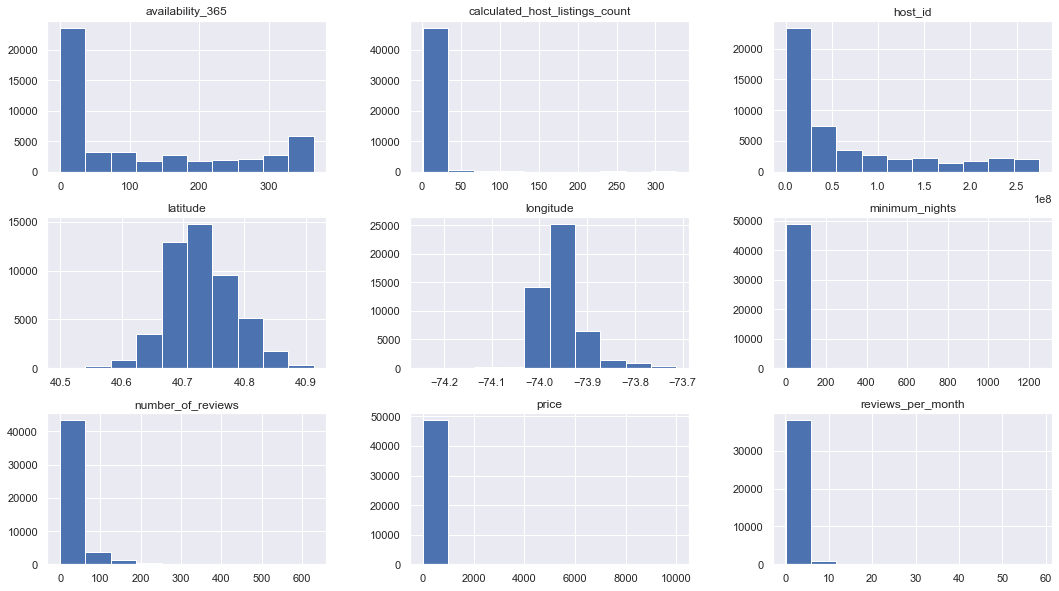

In [24]:
df.drop(['id'],axis=1).hist(figsize=(18,10))
plt.show()

- From latitude and longitude, it is reasonable to say that they look concentraded. We will see more further in this project.
- Many of the variables are positively skewed, having its values concentrated in the lower values of the graphics.

---

### 1. How long, How much and Where

#### 1.1 How many nights people like to stay in NYC?

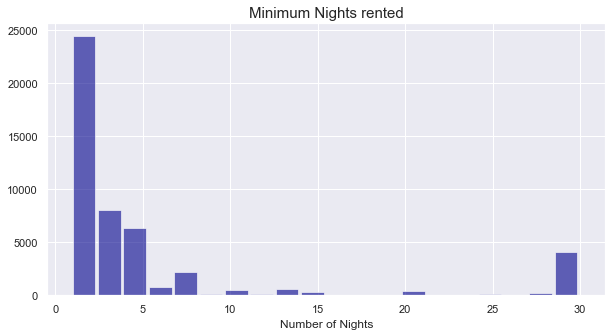

In [16]:
# Countplot minimum_nights
df.minimum_nights[df.minimum_nights<=30].hist(bins = 20, alpha=0.6, width=1.3, figsize=(10,5), color='darkblue')
plt.title('Minimum Nights rented', size=15)
plt.xlabel('Number of Nights')
plt.show()

The average rental is 7 days. However, the most frequent rentals are between 2 to 5 days.
Interesting to notice here is that 30 days rentals occurs frequently too.

#### 1.2 How much are people are paying?

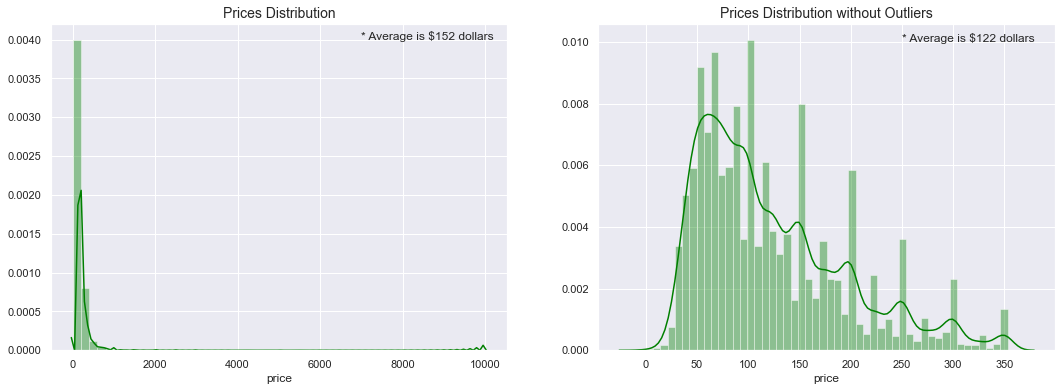

In [7]:
# Price average
fig, axs = plt.subplots(ncols=2, figsize=(18,6))

#Plot without filtering
sns.distplot(df['price'], color = 'green', ax=axs[0])
axs[0].set_title('Prices Distribution', size=14)
axs[0].text(7000,0.004,'* Average is $152 dollars', size=12)

# Plot with Filter
q = df.price.quantile(.95)
sns.distplot(df.price[df.price<q], color = 'green', ax=axs[1])
axs[1].set_title('Prices Distribution without Outliers', size=14)
axs[1].text(250,0.01,'* Average is $122 dollars', size=12)

plt.show()

People are staying in NYC and paying, on average \$120 dollars per day on their Airbnb. On the first graphic, without removing the outliers, the average is 152 USD, but then we would be counting a couple of cases where a person paid 10k USD.

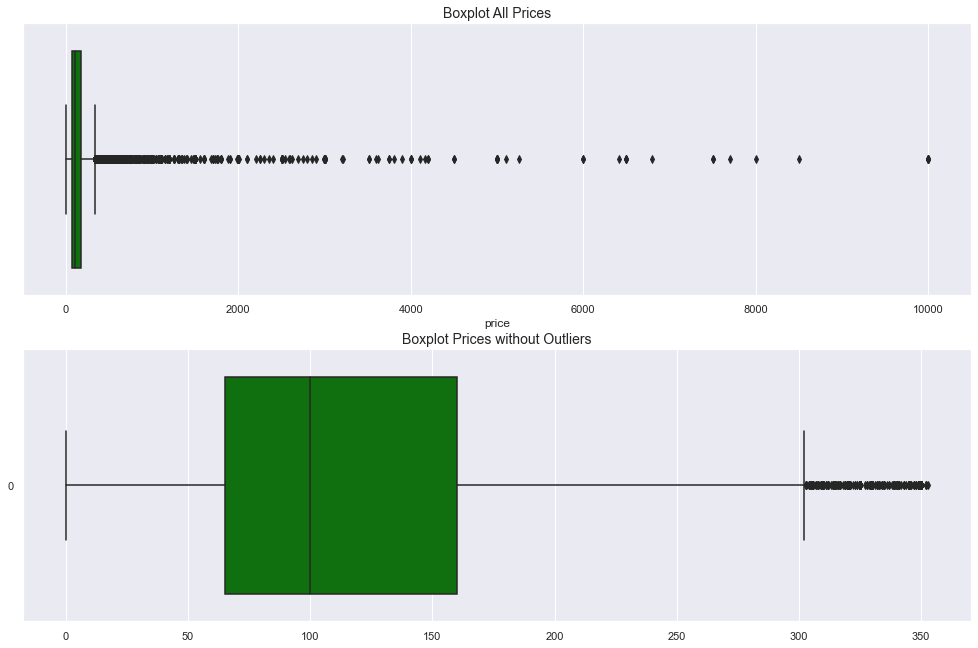

<Figure size 1224x288 with 0 Axes>

In [40]:
# Boxplots Price
fig, axs = plt.subplots(nrows=2, figsize=(17,11))
plt.figure(figsize=(17,4))
sns.boxplot('price', data=df, orient='h', color = 'green', ax=axs[0])
axs[0].set_title('Boxplot All Prices', size=14)
sns.boxplot(data=df.price[df.price<q], orient='h', color='green', ax=axs[1])
axs[1].set_title('Boxplot Prices without Outliers', size=14)
plt.show()

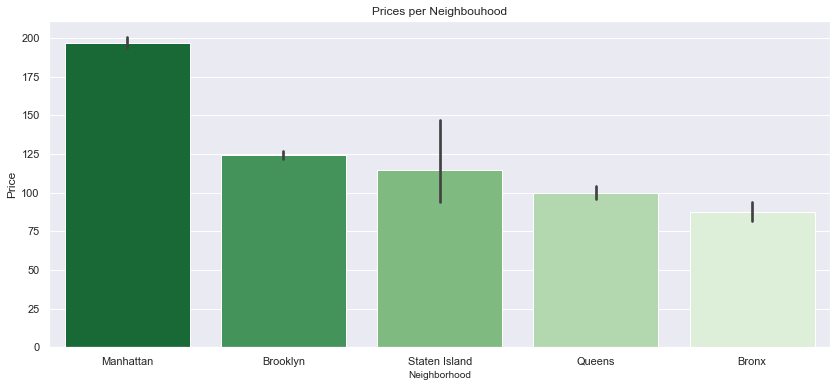

In [101]:
# Prices average by neighbourhood
plt.figure(figsize=(14,6))
sns.barplot(data=df, x='neighbourhood_group', y='price',
            order=['Manhattan','Brooklyn','Staten Island', 'Queens', 'Bronx'],
            palette = 'Greens_r')
plt.xlabel("Neighborhood",fontdict= {'size':10})
plt.ylabel("Price", fontdict= {'size':12})
plt.title("Prices per Neighbouhood")
plt.show()

We can see that Manhattan and Brooklyn are the most expensives, following the offer *vs.* demand rule.

#### 1.3 Where are the properties?

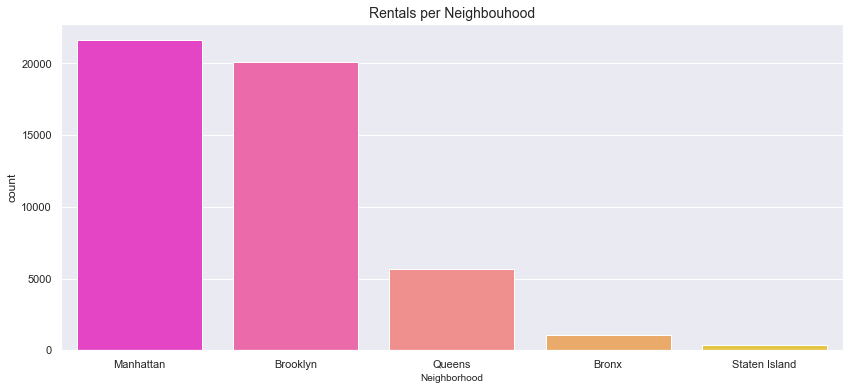

In [90]:
# Where are the most looked neighbourhoods
plt.figure(figsize=(14,6))
g = sns.countplot(x = 'neighbourhood_group', data = df, palette = 'spring',
                  order=df['neighbourhood_group'].value_counts().index)
plt.xlabel("Neighborhood",fontdict= {'size':10})
plt.title("Rentals per Neighbouhood", size=14)
plt.show()

Chart shows that Manhattan and Brooklyn are the preferred locations, what makes sense if we consider that those are the most wanted places to go in the city for business and/or tourism.

#### 1.4 Location *vs.* Price

In [30]:
# Create a subset of the dataset with the top 50 renters
index = df.groupby('host_id').id.count().sort_values(ascending=False).head(50).index
df_top50 = df[df.host_id.isin(index)].reset_index()

In [31]:
# Create a function to add a marker to the map
def add_marker(lat, lon, text):
    return folium.CircleMarker(location=[lat, lon],
                               radius=3,
                               color='black',
                               popup=text).add_to(m)

# Creating the base map, initializing it over Manhattan and adding the points
m = folium.Map(location=[40.75, -73.97], zoom_start=13)
for i in range(len(df_top50)):
    add_marker(df_top50.latitude[i], df_top50.longitude[i],str(df_top50.price[i])+'USD')

# Adding the Heat Map 
data_loc= df_top50[['latitude','longitude', 'price']].values
data_loc =data_loc.tolist()
hm = plugins.HeatMap(data_loc)
hm.add_to(m)

m

Now with this heat map by location and price ploted, it becomes easier to see the locations where the properties are concentrated and also that the higher prices are in Brooklyn and Manhattan, where most business and touristic attractions are located.

#### 1.5 Type of the properties for rent

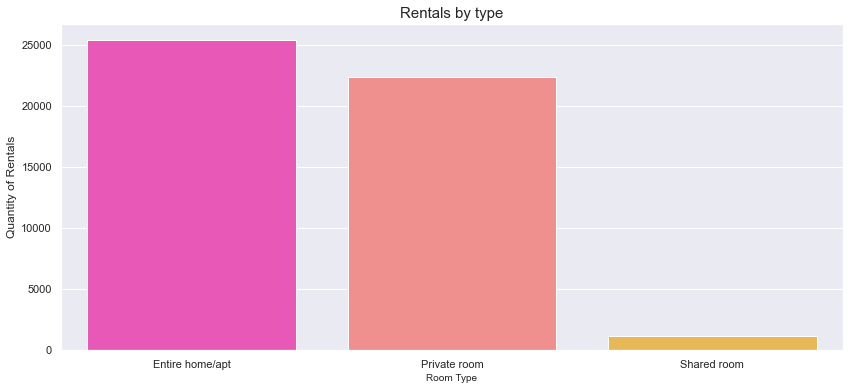

In [65]:
# Type of listings
plt.figure(figsize=(14,6))
g = sns.countplot(x = 'room_type', data = df, palette='spring',
                 order=['Entire home/apt','Private room','Shared room'])
plt.xlabel("Room Type",fontdict= {'size':10})
plt.ylabel("Quantity of Rentals", fontdict= {'size':12})
plt.title("Rentals by type", size=15)
plt.show()

The results show us that usually people rent an entire home/appartment (*52%*), but given NYC is an expensive place and also big city, we can also see almost as many people looking for a Private Room (*46%*), probably using it to capitalize empty spaces.

---

### 2. Which ones are the busiest hosts and why?

The next exploration is to understand which hosts are more successfull on Airbnb and try to understand why that happens.

#### 2.1 Who are the most popular hosts?

In [7]:
# Most busy hosts
busyHosts = pd.DataFrame(df.groupby('host_id').id.count().sort_values(ascending=False).head(10).reset_index())
busyHosts.columns = ['host_id','rentals']

In [8]:
# Appending the names of the busy hosts to the subset dataframe busyHosts
names = []
for r in range(busyHosts.shape[0]):
    for i in range(len(df)):
        if busyHosts.host_id[r] == df.host_id[i]:
            names.append(df.host_name[i])
            break

In [9]:
busyHosts['host_name'] = names
busyHosts

,host_id,rentals,host_name
0,219517861,327,Sonder (NYC)
1,107434423,232,Blueground
2,30283594,121,Kara
3,137358866,103,Kazuya
4,16098958,96,Jeremy & Laura
5,12243051,96,Sonder
6,61391963,91,Corporate Housing
7,22541573,87,Ken
8,200380610,65,Pranjal
9,7503643,52,Vida


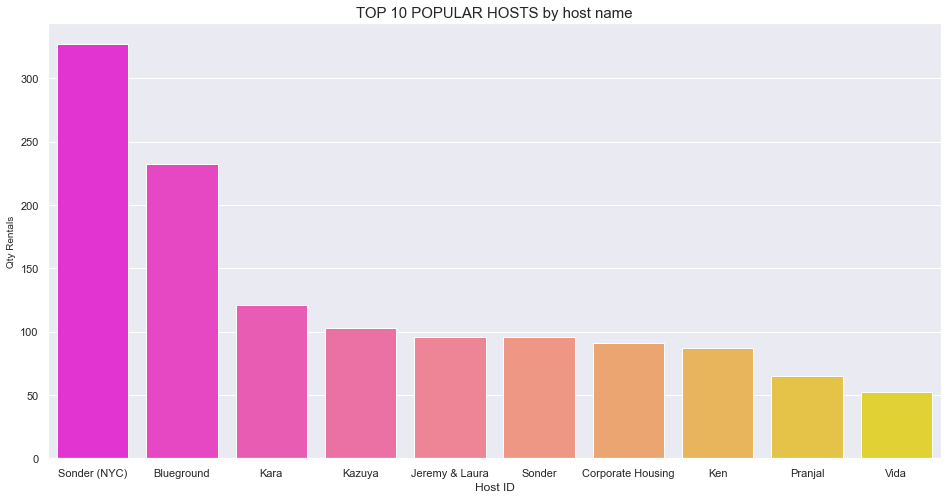

In [13]:
# Bar plot of the Top 10 busyHosts
plt.figure(figsize=(16,8))
g = sns.barplot(y='rentals', x= 'host_name', data=busyHosts, palette='spring')
plt.ylabel("Qty Rentals",fontdict= {'size':10})
plt.xlabel("Host ID", fontdict= {'size':12})
plt.title("TOP 10 POPULAR HOSTS by host name", size=15)
plt.show()

In [14]:
print(f'Unique host IDs: {len(df.host_id.unique())}')
print(f'Top 10 rentals: {sum(busyHosts.rentals)}. Percentual over Total Dataset: {round(sum(busyHosts.rentals)/len(df.id)*100,2)}%')

Unique host IDs: 37457
Top 10 rentals: 1270. Percentual over Total Dataset: 2.6%


From the chart and calculations above, it is possible to extract the information that there is a concentration here. The top 5 renters are responsible for *69%* of the top 10 transactions. The top 10 represent *2,6%* of all rentals, knowing that there are nearly 37,500 host ids registered.

#### 2.2 Where do they have their properties

In [41]:
# Extracting only the Top 10 hosts from original DF and put in a DF.
hosts = list(busyHosts.host_id)
df2 = df[df['host_id'].isin(hosts)]
df2 = pd.DataFrame(df2)

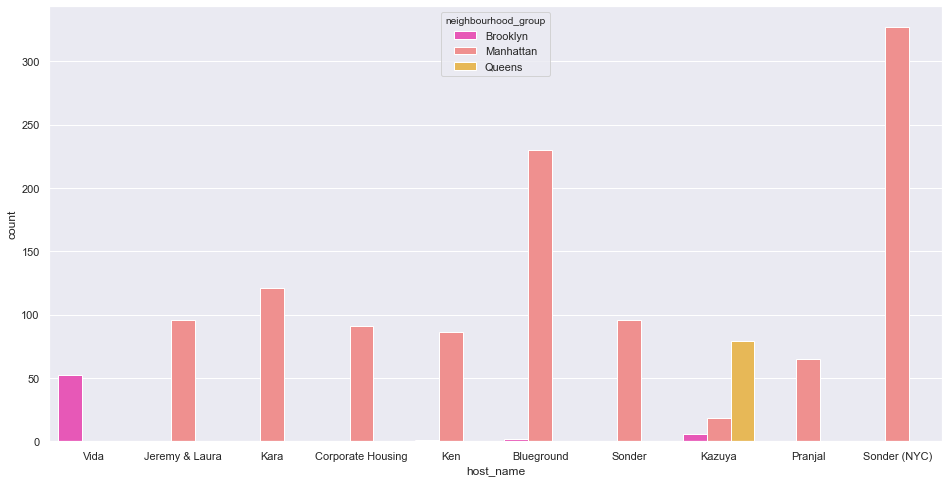

In [45]:
# Count plot of the listings by neighbourhood
plt.figure(figsize=(16,8))
sns.countplot('host_name', data=df2, hue='neighbourhood_group', palette='spring')
plt.show()

The top 10 renters have their estates mostly in Manhattan. 

#### 2.3 How much do they charge

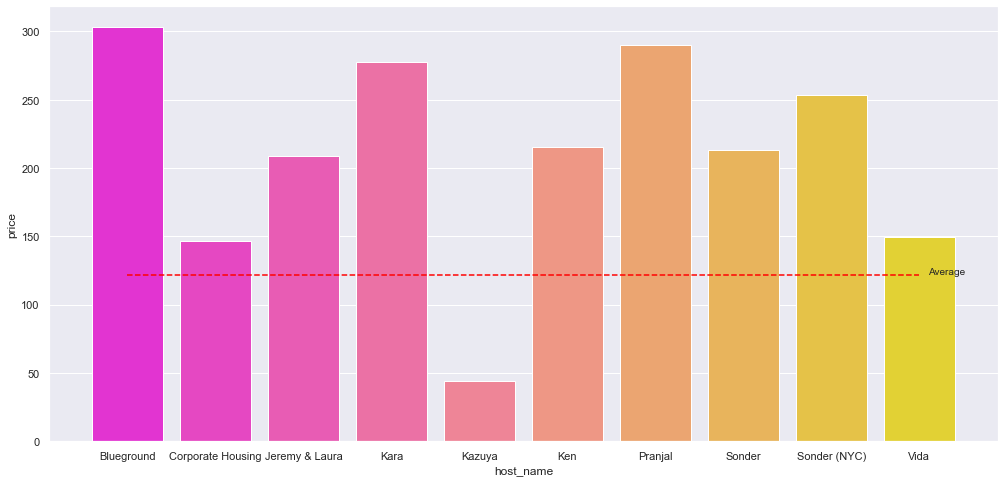

In [109]:
# First let's get the mean dollar amount the top 10 receive per night
top10_mean = df2.groupby('host_name').price.mean().reset_index()

# Barplot showing how much people pay for the rentals of the top 10 hosts
plt.figure(figsize=(17,8))
sns.barplot(x='host_name', y='price', data=top10_mean, palette='spring')

#include average w/o outliers (122 USD)
plt.plot([122, 122, 122, 122, 122, 122, 122, 122, 122, 122], color='red', linestyle='dashed')
plt.text(9.1,122,'Average')
plt.show()

For the top 10 people, all of them (but Kazuya) charge over the average prices. Again, this is a consequence of many options they have in the most expensive ground in the NYC. Location is usually a key factor when it regards real estate. 

#### 2.4 What kind of property Top 10 usually list for renting in Airbnb?

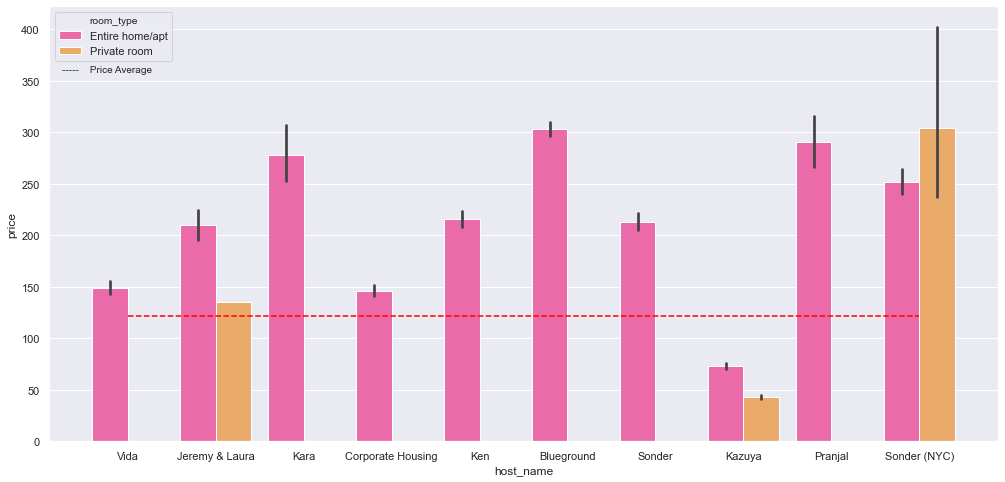

In [131]:
plt.figure(figsize=(17,8))
sns.barplot(x='host_name', y='price', data=df2, hue='room_type', palette='spring')
plt.plot([122, 122, 122, 122, 122, 122, 122, 122, 122, 122], color='red', linestyle='dashed')
plt.text(-0.75,358,'-----    Price Average')
plt.show()

The top 10 renters have most of the times the entire appartment for rent. And this is coherent to the fact they charge over the average as well.

#### 2.5 How long do the Top 10 rent in Airbnb?

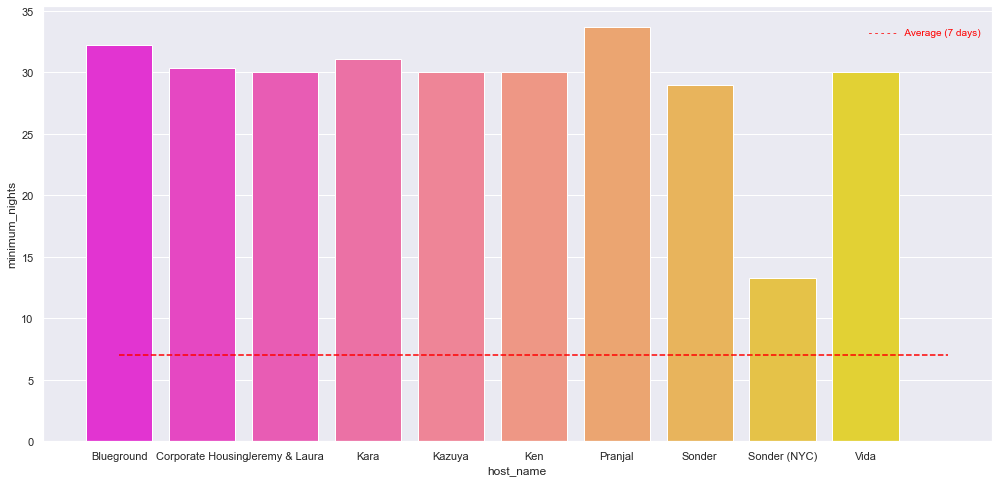

In [243]:
# First let's get the mean night amount the top 10 rent
top10_nightsmean = df2.groupby('host_name').minimum_nights.mean().reset_index()

# Barplot showing how much people pay for the rentals of the top 10 hosts
plt.figure(figsize=(17,8))
sns.barplot(x='host_name', y='minimum_nights', data=top10_nightsmean, palette='spring')

#include average w/o outliers (7 days)
plt.plot([7,7,7,7,7,7,7,7,7,7,7], color='red', linestyle='dashed')
plt.text(9,33,' - - - - -   Average (7 days)', color='red')

plt.show()

Interesting to notice that the top 10 hosts have their properties rented for and entire month, on average.

---

### 3. Best Qualities for renting

Imports for Natural Languare Processing

In [5]:
# Natural Language Processing
import string
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *

# WordCloud
from wordcloud import WordCloud, ImageColorGenerator
from os import path
from PIL import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santos@us.ibm.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
# Making a subset
df3 = df.filter(['name','host_id', 'host_name'], axis=1)
df3.head()

,name,host_id,host_name
0,Clean & quiet apt home by the park,2787,John
1,Skylit Midtown Castle,2845,Jennifer
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura


In [186]:
reviews = df3.name.astype(str)
reviews = " ".join(reviews).strip().lower()

#### 3.1 WordCloud

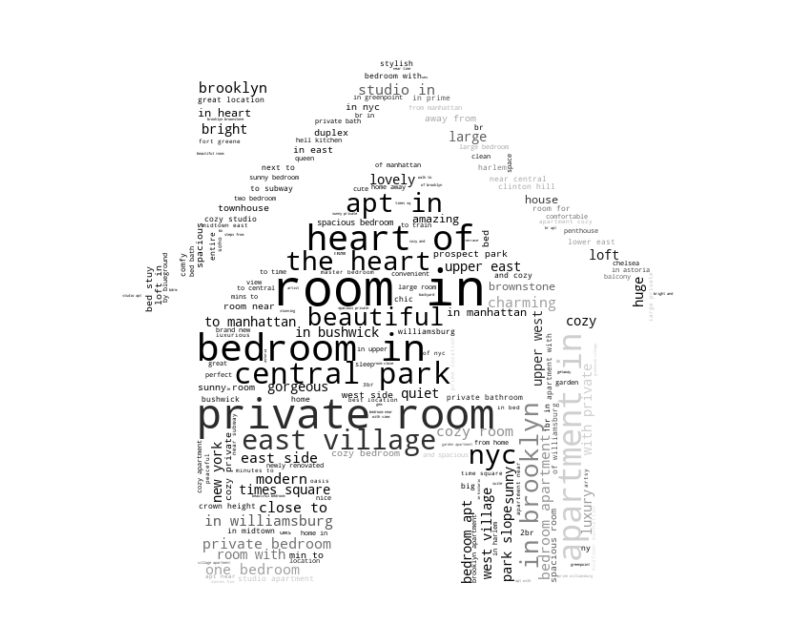

In [188]:
# Generate the text
text = reviews

# Create a mask from a png file to put the wordcloud into a house shape
mask = np.array(Image.open("casa.jpg"))

# Create stopword list:
stopwords = nltk.corpus.stopwords.words('english')

# Create the wordcloud with the colors from the jpg file (mask)
image_colors = ImageColorGenerator(mask)
wordcloud = WordCloud(mode="RGBA", mask=mask, stopwords=stopwords, background_color="white").generate(text)

#Display the wordcloud
plt.figure(figsize=[14,14])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")

# store to file
#plt.savefig("colore_wordcloud.png", format="png", dpi=200)

plt.show()

I like to include a word cloud in the NLP analysis as it is a simple and very visual way to see the words that appear with more frequence, therefore are more important. In the analysis above: 
- We can see that people are staying mostly in apartments
- The heart of Manhattan and Brooklyn are the most mentioned places.
- People like modern and private places, close to business or strategic points
- The Upper East side of the island is more attractive, as there you will find the Central Park, 5th avenue, for example.

#### 3.2 Tokenization and Word Frequence

In [197]:
# Tokenize reviews
tokens = word_tokenize(reviews)

In [198]:
# Exclude punctuation
exclude = set(string.punctuation)
tokens_no_punctuation = [word for word in tokens if word not in exclude]

In [199]:
# Remove stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
tokens_clean = [word for word in tokens_no_punctuation if word not in stopwords]

In [200]:
# Contar palavras e colocar em um dataframe
from collections import Counter
counts = Counter(tokens_clean)
counts_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
counts_df.columns = ['Word','Frequence']

In [203]:
# Sort
counts_df.sort_values(by='Frequence', ascending=False, inplace=True)
# Remove some numbers from the tokens
counts_df.drop(index=[21,54], axis=0, inplace=True)

In [205]:
top20_tokens = counts_df.head(20)
top20_tokens.head(5)

,Word,Frequence
27,room,10061
49,bedroom,7585
120,private,7160
23,apartment,6657
13,cozy,5024


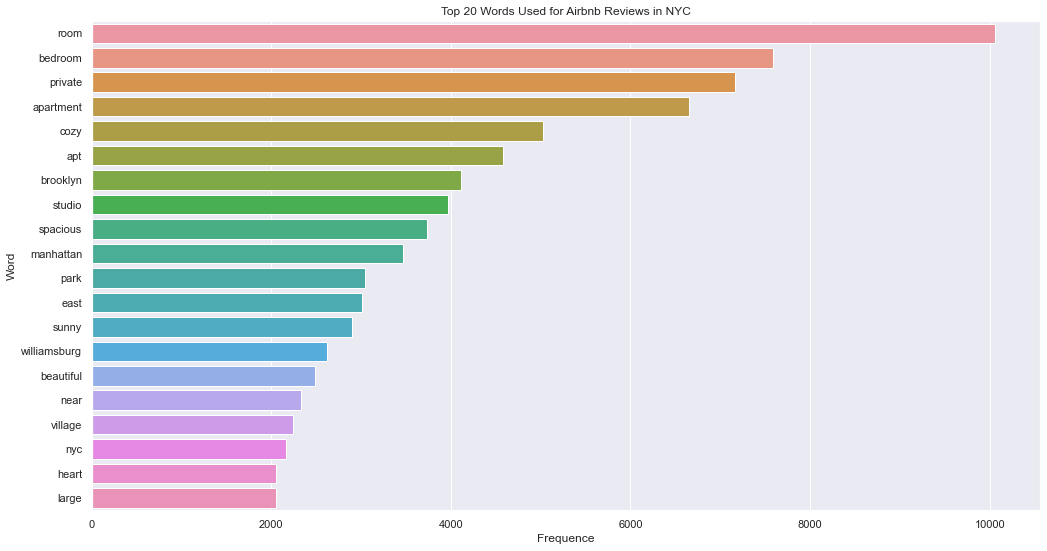

In [206]:
# Plot the Result
plt.figure(figsize=(17,9))
g = sns.barplot(y='Word', x= 'Frequence', data=top20_tokens)
plt.title("Top 20 Words Used for Airbnb Reviews in NYC")
plt.show()

#### 3.3 N-grams

N-grams are 'N' words that are used together, in sequence in a text. So, for example, a Bigram are two words used together in a text *(e.g. cozy apartment)*. Trigrams are three words used in sequence *(e.g. upper east side)*. Analysing those words can bring us more understanding of the reviews, as we can put the words in a context.

In [208]:
# Getting the Bigrams
buscaBigramas = nltk.collocations.BigramCollocationFinder.from_words(tokens_clean)

In [210]:
# Counting the frequence
bigrama_freq = buscaBigramas.ngram_fd.items()

In [211]:
# Putting in a dataframe
FreqBigramas = pd.DataFrame(list(bigrama_freq), 
                               columns = ['Bigram', 'Freq']).sort_values(by = 'Freq', ascending = False)

In [214]:
# Visualize the result
FreqBigramas.head(10)

,Bigram,Freq
361,"(private, room)",2809
146,"(1, bedroom)",1565
21,"(central, park)",1264
140,"(east, village)",1244
270,"(2, bedroom)",1033
1064,"(private, bedroom)",927
45,"(east, side)",926
331,"(one, bedroom)",858
481,"(cozy, room)",849
245,"(bedroom, apartment)",798


The bigrams bring us the following insights:
- Private room is constantly rented
- People rent for 1 or 2 bedroom apartments
- Central Park is a reference, as we saw in the words frequence
- East side is more demanded. And it makes sense since 5th avenue holds a lot of businesses and touristic attractions.

In [217]:
# Search and count Trigram frequence
buscaTrigramas = nltk.collocations.TrigramCollocationFinder.from_words(tokens_clean)
trigrama_freq = buscaTrigramas.ngram_fd.items()

In [218]:
# Putting in a dataframe
FreqTrigramas = pd.DataFrame(list(trigrama_freq), 
                                columns = ['Trigram','Freq']).sort_values(by = 'Freq', ascending = False)

In [219]:
# Visualize the result
FreqTrigramas.head(10)

,Trigram,Freq
739,"(upper, east, side)",553
51,"(upper, west, side)",422
44,"(lower, east, side)",332
877,"(near, central, park)",304
254,"(1, bedroom, apartment)",245
1369,"(cozy, private, room)",241
2299,"(home, away, home)",222
1314,"(1, bedroom, apt)",221
1569,"(2, bedroom, apartment)",209
3167,"(one, bedroom, apartment)",176


The trigrams confirms a lot of those insights from the Bigrams. Let's see:
- Another confirmation that the Upper East Side is really well evaluated.
- People rent 1 or 2 bedroom apartments or private rooms
- Confirmation that the Central Park is a huge reference in Manhattan
- Here we can see more mentions to subjective qualities, such as *cozy* or *home away from home* concepts.

### 4. Analysis of the Reviews Top 10

In [12]:
# Making a subset
df4 = df.filter(['name','host_id', 'host_name'], axis=1)
df4 = df4[df4.host_name.isin(names)]
df4.head()

,name,host_id,host_name
1120,Studio Apt in Park Slope- Brooklyn!,2355439,Kara
1410,1 BR - Garden - Broadway?,3130534,Ken
2631,Amazing Designer Loft in BK Factory,7503643,Vida
2636,Spacious Factory Converted Loft,7503643,Vida
2708,Lovely Factory Loft in Greenpoint!,7503643,Vida


In [13]:
reviews_t10 = df4.name.astype(str)
reviews_t10 = " ".join(reviews_t10).strip().lower()

In [14]:
# Tokenize reviews
tokens_t10 = word_tokenize(reviews_t10)

In [16]:
# Exclude punctuation
exclude = set(string.punctuation)
tokens10_no_punctuation = [word for word in tokens_t10 if word not in exclude]

In [17]:
# Remove stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
tokens10_clean = [word for word in tokens10_no_punctuation if word not in stopwords]

In [23]:
# Getting the Bigrams
buscaBigramas10 = nltk.collocations.BigramCollocationFinder.from_words(tokens10_clean)

In [24]:
# Counting the frequence
bigrama_freq10 = buscaBigramas10.ngram_fd.items()

In [25]:
# Putting in a dataframe
FreqBigramas10 = pd.DataFrame(list(bigrama_freq10), 
                               columns = ['Bigram', 'Freq']).sort_values(by = 'Freq', ascending = False)

In [26]:
# Visualize the result
FreqBigramas10.head(10)

,Bigram,Freq
2942,"(stock, exchange)",158
2941,"(sonder, stock)",158
1390,"(1br, w/)",98
1514,"(rooftop, sonder)",63
1391,"(w/, gym)",63
2833,"(kitchen, sonder)",63
824,"(gym, doorman)",62
1513,"(1br, rooftop)",61
1462,"(doorman, blueground)",61
28,"(1, bedroom)",59


For the top 10 hosts, we see that a common Bigram in the reviews is related to stock exchange, probably rented by people doing business in Manhattan.

In [27]:
# Search and count Trigram frequence
buscaTrigramas10 = nltk.collocations.TrigramCollocationFinder.from_words(tokens10_clean)
trigrama_freq10 = buscaTrigramas10.ngram_fd.items()

In [28]:
# Putting in a dataframe
FreqTrigramas10 = pd.DataFrame(list(trigrama_freq10), 
                                columns = ['Trigram','Freq']).sort_values(by = 'Freq', ascending = False)

In [29]:
# Visualize the result
FreqTrigramas10.head(10)

,Trigram,Freq
4396,"(sonder, stock, exchange)",158
2171,"(sonder, 116, john)",55
4413,"(kitchen, sonder, stock)",51
4401,"(sofa, bed, sonder)",47
4400,"(1br, sofa, bed)",37
2136,"(1br, rooftop, sonder)",36
4402,"(bed, sonder, stock)",36
1979,"(w/, gym, doorman)",35
2370,"(gym, doorman, blueground)",35
4406,"(1br, kitchen, sonder)",33


The trigams for the top 10 bring mentions to some amendments like gym, rooftop, kitchen and doorman that appears to be appreciated by the clients. *Sonder* is a company from NYC that owns many apartments and that is why they appear so frequently in bigrams and trigrams.

## Conclusion Report

After a complete exploration of the Airbnb dataset for NYC rentals, we can extract some good information.
NYC is one of the most important cities in the world. The city's GDP is around 1.5 trillion dollars (*Business Insider*), what is bigger than many countries. Thus, the quantity of businesses and tourism happening in the city attracts huge amounts of people every day.

In New York, the Manhattan island is the center of the economy, as it hosts many skyscrapers with countless offices doing business every day, as well as many well known touristic attractions like the Empire State Building, Times Square, Central Park that brings another countless number of people to visit the city every year. Thus, naturally the neighbourhood holds 44% of the places listed for rental. Brooklyn comes in second place with 41%, but that is mainly given its proximity to the island.

The amount being spent to stay in the city is somewhere between 120 USD and 150 USD per night for an apartment or a private room and people like to stay less than a week (2 to 5 days are the most common rentals). Usually the clients are looking for a 1 or 2 bedroom apartment - *similar to a hotel* - and they are interested in locations on the Upper East Side (commonly mentioned as the 'heart of Manhattan'), with easy access to the Central Park and all of the benefits of that area. The reviews also mention concepts like 'private' and 'cozy' rooms, demonstrating the clients are worried about cleanliness and well maintained.

Looking for the other side of the transaction (the hosts who rent their properties), we can see they have their location concentrated in Manhattan and Brooklyn. Top 10 hosts are able to charge more than average for their apartments or rooms - *I assume this is due to the location* - and they keep the space located for 30 days on average. So this leads us to the fact that the top 10 hosts are probably not renting to tourists, but they are working with businesses, so they keep the location rented for longer periods and for a higher price.